# 3D UNET for 3DCT Scans (Baseline)
Baseline model with metrics to compare to other models

In [25]:
import torch
torch.cuda.is_available()

True

In [26]:
import os
base_dir = '/kaggle/input/LIDC-IDRI-slices'
os.chdir(base_dir)

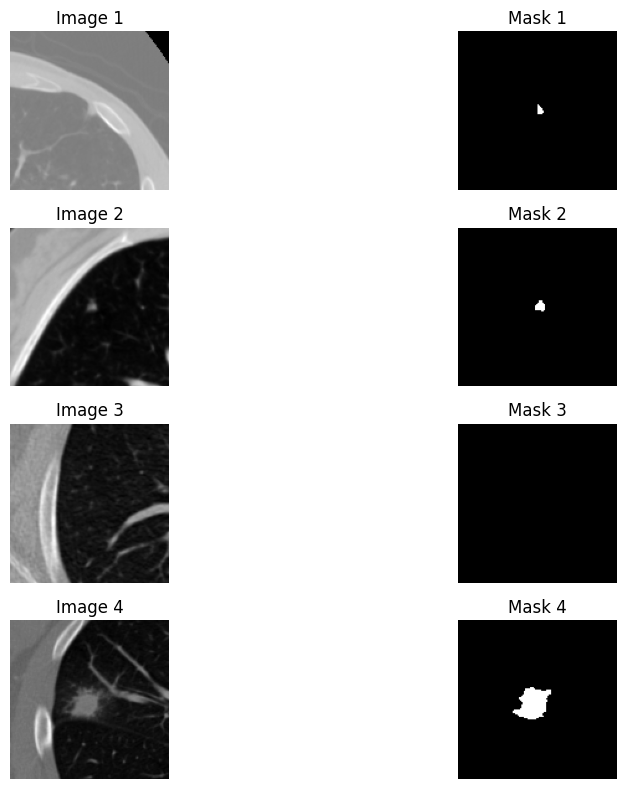

In [27]:
import matplotlib.pyplot as plt
import cv2
import os
import random

def get_image_and_masks(base_dir):
    dataset = {}
    
    # Iterate over the samples and nodules in the base directory
    for sample in sorted(os.listdir(base_dir)):
        sample_dir = os.path.join(base_dir, sample)
        
        # Skip if not a directory
        if not os.path.isdir(sample_dir):
            continue
        
        for nodule in sorted(os.listdir(sample_dir)):
            nodule_dir = os.path.join(sample_dir, nodule)
            
            # Skip if not a directory
            if not os.path.isdir(nodule_dir):
                continue
            
            image_path = os.path.join(nodule_dir, 'images')
            mask_path = os.path.join(nodule_dir, 'mask-0')

            # Check if both paths exist
            if os.path.exists(image_path) and os.path.exists(mask_path):
                images = [os.path.join('images', img) for img in sorted(os.listdir(image_path))]
                masks = [os.path.join('mask-0', mask) for mask in sorted(os.listdir(mask_path))]
                # Store images and masks in the dataset
                dataset[(sample, nodule)] = (images, masks)
    
    return dataset

def display_images(base_dir, data_paths):
    # Randomly select 4 (sample, nodule) pairs
    random_samples = random.sample(list(data_paths.keys()), 4)
    
    # Prepare the plot
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8), tight_layout=True)
    
    for i, (sample, nodule) in enumerate(random_samples):
        images, masks = data_paths[(sample, nodule)]
        
        # Select a random image and mask pair
        random_idx = random.randint(0, len(images) - 1)
        image = images[random_idx]
        mask = masks[random_idx]
        
        # Read image and mask
        image_path = os.path.join(base_dir, sample, nodule, image)
        mask_path = os.path.join(base_dir, sample, nodule, mask)
        
        plotted_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plotted_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Display image and mask
        axs[i, 0].imshow(plotted_img, cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title(f"Image {i+1}")
        
        axs[i, 1].imshow(plotted_mask, cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title(f"Mask {i+1}")
    
    plt.show()

# Example usage
data_paths = get_image_and_masks(base_dir)
display_images(base_dir, data_paths)

## Augmented Data

In [28]:
import os

base_dir = '/kaggle/output'  # Change to kaggle/working, which is writable
dataset = 'dataset'
os.makedirs(os.path.join(base_dir, dataset, 'images'), exist_ok=True)
os.makedirs(os.path.join(base_dir, dataset, 'masks'), exist_ok=True)


print("Directories created successfully in kaggle/output/")



Directories created successfully in kaggle/output/


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt 
import torch 
from IPython.display import clear_output

TARGET_SIZE = (224,224)
# #AUGMENTATION CONTROLS
# ROTATION_ANGLE = 30
# ROTATION_SCALE = 1
# FLIP_CODE = 0
# ZOOM_FACTOR = 1.2

base_input_dir = '/kaggle/input/LIDC-IDRI-slices'

# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {DEVICE}")

# def augment_image(img):
#     height, width = img.shape[:2]
#     #rotated
#     rotation_matrix = cv2.getRotationMatrix2D((height // 2, width // 2), angle = ROTATION_ANGLE, scale = ROTATION_SCALE)
#     rotated_img = cv2.warpAffine(img, rotation_matrix, (height, width))
#     #Flipped
#     flipped_img = cv2.flip(img, FLIP_CODE)
#     #Zoomed
#     zoomed = cv2.resize(img, None, fx=ZOOM_FACTOR, fy=ZOOM_FACTOR, interpolation=cv2.INTER_LINEAR)
#     zoomed_img = zoomed[:height, :width]  
#     return [rotated_img, flipped_img, zoomed_img]
    

    

for index, dp in enumerate(sorted(list(data_paths.keys()))):
    sample, nodule = dp
    images = data_paths[dp][0]
    masks = data_paths[dp][1]
    path_to_image = [os.path.join(base_input_dir, sample, nodule, img) for img in images]
    path_to_mask = [os.path.join(base_input_dir, sample, nodule, mask) for mask in masks]
    print(f"{index} of {len(data_paths)}..")
    print(f"{index * 100 / len(data_paths):.2f}%..")  # Format to 2 decimal places
    for idx, (img, msk) in enumerate(zip(path_to_image, path_to_mask)):
        image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(msk, cv2.IMREAD_GRAYSCALE)
        
        if image is None or mask is None:
            print(f"Skipping {img} or {msk} as they couldn't be read.")
            continue
        
        resized_image = cv2.resize(image, TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
        resized_mask = cv2.resize(mask, TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
        cv2.imwrite(os.path.join(base_dir, dataset, 'images', f"{sample}_{nodule}_{idx}.png"), resized_image)   
        cv2.imwrite(os.path.join(base_dir, dataset, 'masks', f"{sample}_{nodule}_{idx}.png"), resized_mask)
        clear_output(wait = True)

       


1 of 2630..
0.04%..


In [ ]:
# import os
# import random
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt


# # Paths to directories
# base_dir = '/kaggle/output/dataset'
# image_dir = os.path.join(base_dir, 'images/original')
# mask_dir = os.path.join(base_dir, 'masks/original')
# aug_image_dir = os.path.join(base_dir, 'images/augmented')
# aug_mask_dir = os.path.join(base_dir, 'masks/augmented')

# # Get sorted file lists
# original_images = sorted(os.listdir(image_dir))
# original_masks = sorted(os.listdir(mask_dir))
# augmented_images = sorted(os.listdir(aug_image_dir))
# augmented_masks = sorted(os.listdir(aug_mask_dir))
# # Select 3-4 random original images
# num_samples = random.randint(3, 4)
# selected_samples = random.sample(original_images, num_samples)

# # Prepare figure
# fig, axes = plt.subplots(num_samples, 4, figsize=(12, num_samples * 3))

# for i, img_name in enumerate(selected_samples):
#     # Load original image and mask
#     img_path = os.path.join(image_dir, img_name)
#     mask_path = os.path.join(mask_dir, img_name)
    
#     img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
#     aug_img_prefix = img_name.replace('.png', '_aug_')
#     aug_img_names = sorted([f for f in augmented_images if f.startswith(aug_img_prefix)])
#     aug_msk_names = sorted([f for f in augmented_masks if f.startswith(aug_img_prefix)])

#     if aug_img_names and aug_msk_names:
#         aug_img_path = os.path.join(aug_image_dir, aug_img_names[0])
#         aug_msk_path = os.path.join(aug_mask_dir, aug_msk_names[0])

#         aug_img = cv2.imread(aug_img_path, cv2.IMREAD_GRAYSCALE)
#         aug_mask = cv2.imread(aug_msk_path, cv2.IMREAD_GRAYSCALE)
#     else:
#         aug_img = np.zeros_like(img) 
#         aug_mask = np.zeros_like(mask)

#     # Plot each column
#     axes[i, 0].imshow(img, cmap='gray')
#     axes[i, 0].set_title("Original Image")
    
#     axes[i, 1].imshow(mask, cmap='gray')
#     axes[i, 1].set_title("Original Mask")

#     axes[i, 2].imshow(aug_img, cmap='gray')
#     axes[i, 2].set_title("Augmented Image")

#     axes[i, 3].imshow(aug_mask, cmap='gray')
#     axes[i, 3].set_title("Augmented Mask")

#     # Remove axes ticks
#     for ax in axes[i]:
#         ax.axis('off')

# # Adjust layout
# plt.tight_layout()
# plt.show()


## Test, Train and Validation Split

In [ ]:
import glob
import random
from sklearn.model_selection import train_test_split


image_paths = sorted(list(glob.glob("/kaggle/output/dataset/images/*.png")))
mask_paths = sorted(list(glob.glob("/kaggle/output/dataset/masks/*.png")))

combined = list(zip(image_paths, mask_paths))
random.shuffle(combined)
image_paths, mask_paths = zip(*combined)

# Train (70%), Validation (10%), Test (10%)
train_imgs, test_imgs, train_masks, test_masks = train_test_split(image_paths, mask_paths, test_size=0.2, random_state=42)
val_imgs, test_imgs, val_masks, test_masks = train_test_split(test_imgs, test_masks, test_size=0.5, random_state=42)

print(f"Train: {len(train_imgs)}, Validation: {len(val_imgs)}, Test: {len(test_imgs)}")


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define augmentation pipeline
train_transform = A.Compose([
    A.RandomResizedCrop(height=224, width=224, scale=(0.5, 1.0)),  # Focuses more on smaller objects
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ElasticTransform(alpha=1, sigma=50, p=0.3),
    A.Normalize(mean=(0.5,), std=(0.5,)),  
    ToTensorV2()
])

class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform = None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        img = img.astype(np.float32) / 255.0
        mask = (mask > 0).astype(np.uint8)

        img = torch.tensor(img).unsqueeze(0) 
        mask = torch.tensor(mask).float().unsqueeze(0)  

        return img, mask

# Create dataset objects
train_dataset = SegmentationDataset(train_imgs, train_masks, transform=train_transform)
val_dataset = SegmentationDataset(val_imgs, val_masks)
test_dataset = SegmentationDataset(test_imgs, test_masks)

# Create DataLoaders
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def compute_foreground_ratio(masks):
    foreground_ratios = []
    
    for mask in masks:
        mask = mask.cpu().numpy()  # Convert to NumPy (if it's a tensor)
        mask = (mask > 0)  # Convert to binary
        
        foreground_pixels = np.sum(mask)
        total_pixels = mask.size
        foreground_ratio = foreground_pixels / total_pixels

        foreground_ratios.append(foreground_ratio)

    return foreground_ratios

# Compute foreground ratios for all training masks
train_fg_ratios = compute_foreground_ratio([train_dataset[i][1] for i in range(len(train_dataset))])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(train_fg_ratios, bins=20, color='royalblue', alpha=0.7, edgecolor='black')
plt.xlabel("Foreground Pixel Ratio")
plt.ylabel("Number of Images")
plt.title("Foreground vs. Background Pixel Distribution")
plt.show()


## Model Creation

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class DoubleConv(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super(DoubleConv, self).__init__()
#         self.conv = nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3)  
#         )

#     def forward(self, x):
#         return self.conv(x)

# class UNet(nn.Module):
#     def __init__(self, in_channels=1, out_channels=1, features=[64, 128, 256, 512]):
#         super(UNet, self).__init__()
#         self.encoder = nn.ModuleList()
#         self.decoder = nn.ModuleList()
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Encoding Path
#         for feature in features:
#             self.encoder.append(DoubleConv(in_channels, feature))
#             in_channels = feature

#         # Bottleneck
#         # Bottleneck with Dropout
#         self.bottleneck = nn.Sequential(
#             DoubleConv(features[-1], features[-1] * 2),
#             nn.Dropout(p=0.3)  # Added dropout
#         )

#         # Decoding Path
#         for feature in reversed(features):
#             self.decoder.append(
#                 nn.ConvTranspose2d(feature * 2, feature, kernel_size=2, stride=2)
#             )
#             self.decoder.append(DoubleConv(feature * 2, feature))

#         # Final Convolution
#         self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

#     def forward(self, x):
#         skip_connections = []
#         for down in self.encoder:
#             x = down(x)
#             skip_connections.append(x)
#             x = self.pool(x)
        
#         x = self.bottleneck(x)
#         skip_connections = skip_connections[::-1]
        
#         for idx in range(0, len(self.decoder), 2):
#             x = self.decoder[idx](x)
#             skip_connection = skip_connections[idx // 2]
#             x = torch.cat((skip_connection, x), dim=1)
#             x = self.decoder[idx + 1](x)
            
#         return self.final_conv(x)  # No torch.sigmoid()



In [ ]:
# from torchsummary import summary

# model = UNet().to("cuda" if torch.cuda.is_available() else "cpu")  # Move to correct device
# summary(model, input_size=(1, 256, 256))  # Adjust input size based on your dataset


In [ ]:
# import torch.nn.functional as F

# def weighted_bce_loss(pred, target, weights):
#     """
#     Compute weighted binary cross-entropy loss.
    
#     Args:
#         pred: Model predictions (logits before sigmoid)
#         target: Ground truth masks
#         weights: Class weights tensor [weight_bg, weight_fg]
    
#     Returns:
#         Weighted BCE loss value
#     """
#     pred = torch.sigmoid(pred)  # Convert logits to probabilities

#     # Compute per-pixel BCE loss
#     bce_loss = F.binary_cross_entropy(pred, target, reduction="none")

#     # Apply per-pixel weighting
#     weight_map = target * weights[1] + (1 - target) * weights[0]
#     weighted_bce = weight_map * bce_loss

#     return weighted_bce.mean()

# def get_class_weights(masks):
#     # Ensure masks is a tensor
#     if isinstance(masks, torch.Tensor):
#         fg_pixels = masks.sum()  # Use PyTorch's sum instead of NumPy's
#         total_pixels = masks.numel()  # Get total number of elements
#     else:
#         fg_pixels = np.sum(masks)  # Keep NumPy for non-Tensor inputs
#         total_pixels = masks.size

#     bg_pixels = total_pixels - fg_pixels

#     weight_fg = 1 / (fg_pixels + 1e-6)
#     weight_bg = 1 / (bg_pixels + 1e-6)
#     return torch.tensor([weight_bg, weight_fg], dtype=torch.float32, device=masks.device)


# def dice_loss(pred, target, smooth=1e-5):
#     pred = torch.sigmoid(pred)  # Convert logits to probabilities
#     intersection = (pred * target).sum()
#     return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

In [ ]:
# import os
# import torch
# import torch.optim as optim
# from prettytable import PrettyTable  # Import for tabular display
# from torch.optim.lr_scheduler import CyclicLR


# NUM_EPOCHS = 24 
# LEARNING_RATE = 1e-4
# # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")


# checkpoint_dir = "/kaggle/working/checkpoints"
# os.makedirs(checkpoint_dir, exist_ok=True)

# # Initialize model and move it to the correct device
# model = UNet().to(device)

# # Define optimizer and scheduler
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

# # Dice Coefficient Function
# def dice_coeff(pred, target, epsilon=1e-6):
#     pred = torch.sigmoid(pred)  # Convert logits to probabilities
#     intersection = (pred * target).sum()
#     union = pred.sum() + target.sum()
#     dice = (2. * intersection + epsilon) / (union + epsilon)
#     return dice.item()

# # IoU (Jaccard Index) Function
# def iou_score(pred, target, epsilon=1e-6):
#     pred = torch.sigmoid(pred)
#     pred = (pred > 0.5).float()

#     intersection = (pred * target).sum()
#     union = pred.sum() + target.sum() - intersection

#     iou = (intersection + epsilon) / (union + epsilon)
#     return iou.item()

# def add_weight_noise(model, noise_factor=0.02):
#     with torch.no_grad():
#         for param in model.parameters():
#             param.add_(torch.randn_like(param) * noise_factor)

# previous_val_loss = float("inf")

# # Print table header
# header_table = PrettyTable()
# header_table.field_names = ["Epoch", "Train Loss", "Val Loss", "Train Dice", "Val Dice", "Train IoU", "Val IoU"]
# print(header_table)  # Print header once

# start_time = time.time()
# for epoch in range(NUM_EPOCHS):
#     model.train()
#     total_train_loss = 0.0
#     total_dice = 0.0
#     total_iou = 0.0

#     for img, mask in train_loader:
#         img, mask = img.to(device), mask.to(device)  # Move data to the same device as the model

#         optimizer.zero_grad()
#         output = model(img)

#         mask_weights = get_class_weights(mask).to(device)  # Ensure weights are also on the same device
#         loss = 0.5 * weighted_bce_loss(output, mask.float(), mask_weights) + 0.5 * dice_loss(output, mask)


#         loss.backward()
#         optimizer.step()

#         total_train_loss += loss.item()
#         total_dice += dice_coeff(output, mask)
#         total_iou += iou_score(output, mask)

#     avg_train_loss = total_train_loss / len(train_loader)
#     avg_dice = total_dice / len(train_loader)
#     avg_iou = total_iou / len(train_loader)

#     # VALIDATION
#     model.eval()
#     total_val_loss = 0.0
#     total_val_dice = 0.0
#     total_val_iou = 0.0

#     with torch.no_grad():
#         for img, mask in val_loader:
#             img, mask = img.to(device), mask.to(device)
#             output = model(img)

#             loss = weighted_bce_loss(output, mask.float(), get_class_weights(mask).to(device))
#             total_val_loss += loss.item()
#             total_val_dice += dice_coeff(output, mask)
#             total_val_iou += iou_score(output, mask)

#     avg_val_loss = total_val_loss / len(val_loader)
#     avg_val_dice = total_val_dice / len(val_loader)
#     avg_val_iou = total_val_iou / len(val_loader)

#     scheduler.step(avg_val_loss)
    
#     # Create row for current epoch
#     result_table = PrettyTable()
#     result_table.add_row([epoch + 1, f"{avg_train_loss:.4f}", f"{avg_val_loss}", 
#                           f"{avg_dice:.4f}", f"{avg_val_dice:.6f}", f"{avg_iou:.4f}", f"{avg_val_iou:.4f}"])
#     print(result_table)

#     # Save best model if validation loss improves
#     if epoch % 3 == 0:
#         checkpoint_path = os.path.join(checkpoint_dir, "best_model.pth")
#         torch.save({
#             'epoch': epoch + 1,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': best_loss,
#         }, checkpoint_path)
#         print(f"✅ Model saved at {checkpoint_path} (Epoch: {epoch})")
# # End the timer
# end_time = time.time()

# # Total training time
# total_time = end_time - start_time
# print(f"\nTotal Training Time: {total_time:.2f} seconds ({total_time / 60:.2f} minutes)")

In [ ]:
# model.eval()

In [ ]:
# import torch
# import torchmetrics
# import numpy as np
# import matplotlib.pyplot as plt

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initialize metrics
# dice_metric = torchmetrics.Dice().to(device)  # Binary segmentation
# iou_metric = torchmetrics.JaccardIndex(task="binary").to(device)

# for i, (image, mask) in enumerate(test_loader):  
#     image, mask = image.to(device), mask.to(device)

#     with torch.no_grad():
#         output = model(image)

#     predicted_mask = torch.sigmoid(output)
#     predicted_mask = (predicted_mask > 0.35).int()  # Thresholding to get binary mask

#     mask = (mask > 0.5).int()

#     # Compute metrics
#     dice_score = dice_metric(predicted_mask, mask).item()
#     iou_score = iou_metric(predicted_mask, mask).item()

#     # Print metrics
#     print(f"Image {i+1}:")
#     print(f"  Dice Score: {dice_score:.4f}")
#     print(f"  IoU Score: {iou_score:.4f}")
#     print("-" * 30)

#     if i >= 10:  # Stop after 10 images
#         break


In [ ]:
# import os
# import subprocess
# from IPython.display import FileLink, display

# def download_file(path, download_file_name):
#     os.chdir('/kaggle/working/')
#     zip_name = f"/kaggle/working/{download_file_name}.zip"
#     command = f"zip {zip_name} {path} -r"
#     result = subprocess.run(command, shell=True, capture_output=True, text=True)
#     if result.returncode != 0:
#         print("Unable to run zip command!")
#         print(result.stderr)
#         return
#     display(FileLink(f'{download_file_name}.zip'))


## Setting up SWIN

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

num_epochs = 100

class DiceBCELoss(nn.Module):
    def __init__(self):
        super(DiceBCELoss, self).__init__()
        self.bce = nn.BCEWithLogitsLoss()

    def forward(self, preds, targets, smooth=1e-6):
        preds = torch.sigmoid(preds)
        intersection = (preds * targets).sum(dim=(2, 3))
        dice = (2. * intersection + smooth) / (preds.sum(dim=(2, 3)) + targets.sum(dim=(2, 3)) + smooth)
        dice_loss = 1 - dice.mean()
        bce_loss = self.bce(preds, targets)
        return 0.5 * dice_loss + 0.5 * bce_loss  # Equal weighting

LEARNING_RATE = 1e-4  # Reduced from 1e-3
WEIGHT_DECAY = 1e-4  # Reduced from 1e-2

criterion = nn.BCEWithLogitsLoss()  # New loss function
optimizer = optim.Adam(swin_seg_model.parameters(), lr=LEARNING_RATE)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-6)  # Reduce LR when loss plateaus


In [ ]:
import timm
import torch
import torch.nn as nn

class SwinSegmentationModel(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.encoder = backbone  # Swin Transformer backbone

        # Adjust the decoder to match the encoder's output channels (96 channels)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(96, 384, kernel_size=2, stride=2),  # Adjust input channels to 96
            nn.ReLU(),
            nn.ConvTranspose2d(384, 192, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(192, 1, kernel_size=2, stride=2)  # Binary mask
        )

    def forward(self, x):
       
        features = self.encoder(x)  # Pass input through the Swin encoder
        
        # Assuming features[0] is the output we need (can vary based on the depth of layers you want)
        feature_map = features[0]  # Extract the first feature map
        
        b, c, h, w = feature_map.shape  # Ensure correct shape
          
        # Fixing the order by permuting the tensor to (batch_size, channels, height, width)
        feature_map = feature_map.permute(0, 3, 1, 2)  # [1, 96, 56, 56] -> [1, 96, 56, 56]
        
        output = self.decoder(feature_map)  # Upsample
       
        return output

# Load pretrained Swin-Tiny
backbone = timm.create_model("swin_tiny_patch4_window7_224", pretrained=True, num_classes=0, features_only=True)

# Build segmentation model
swin_seg_model = SwinSegmentationModel(backbone).to(device)

In [ ]:
import torch
import torch.nn.functional as F
import time
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create directories
checkpoint_dir = "/kaggle/output/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
log_file = "/kaggle/output/training_log.txt"

start_time = time.time()

# Write headers to log file
with open(log_file, "w") as f:
    f.write("Epoch | Loss | Grad Norm | Train IoU | Train Dice | Val IoU | Val Dice\n")
    f.write("=" * 90 + "\n")

print("=" * 90)
print(f"{'Epoch':^6} | {'Loss':^10} | {'Grad Norm':^12} | {'Train IoU':^10} | {'Train Dice':^10} | {'Val IoU':^10} | {'Val Dice':^10}")
print("=" * 90)

for epoch in range(num_epochs):
    swin_seg_model.train()
    running_loss = 0.0
    total_train_iou, total_train_dice, train_samples = 0.0, 0.0, 0

    for images, masks in train_loader:
        images, masks = images.to(device).repeat(1, 3, 1, 1), masks.to(device)
        optimizer.zero_grad()
        outputs = swin_seg_model(images)
        
        masks_resized = F.interpolate(masks, size=outputs.shape[2:], mode='bilinear', align_corners=False)
        loss = criterion(outputs, masks_resized.float())  
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        outputs = torch.sigmoid(outputs)  
        outputs = (outputs > 0.5).float()  
        masks_resized = (masks_resized > 0.5).float()

        intersection = (outputs * masks_resized).sum(dim=(2, 3))
        union = (outputs + masks_resized).sum(dim=(2, 3)) - intersection
        iou = (intersection + 1e-6) / (union + 1e-6)
        dice = (2 * intersection + 1e-6) / (outputs.sum(dim=(2, 3)) + masks_resized.sum(dim=(2, 3)) + 1e-6)

        total_train_iou += iou.mean().item()
        total_train_dice += dice.mean().item()
        train_samples += 1

    avg_train_iou = total_train_iou / train_samples
    avg_train_dice = total_train_dice / train_samples

    total_norm = sum(p.grad.data.norm(2).item() ** 2 for p in swin_seg_model.parameters() if p.grad is not None) ** 0.5
    
    swin_seg_model.eval()
    total_val_iou, total_val_dice, val_samples = 0.0, 0.0, 0

    with torch.no_grad():
        for val_images, val_masks in val_loader:
            val_images, val_masks = val_images.to(device).repeat(1, 3, 1, 1), val_masks.to(device)
            val_outputs = swin_seg_model(val_images)
            val_outputs = torch.sigmoid(val_outputs)
            val_outputs = (val_outputs > 0.5).float()

            val_masks_resized = F.interpolate(val_masks, size=val_outputs.shape[2:], mode='bilinear', align_corners=False)
            val_masks_resized = (val_masks_resized > 0.5).float()

            intersection = (val_outputs * val_masks_resized).sum(dim=(2, 3))
            union = (val_outputs + val_masks_resized).sum(dim=(2, 3)) - intersection
            iou = (intersection + 1e-6) / (union + 1e-6)
            dice = (2 * intersection + 1e-6) / (val_outputs.sum(dim=(2, 3)) + val_masks_resized.sum(dim=(2, 3)) + 1e-6)

            total_val_iou += iou.mean().item()
            total_val_dice += dice.mean().item()
            val_samples += 1

    avg_val_iou = total_val_iou / val_samples
    avg_val_dice = total_val_dice / val_samples

    print(f"{epoch+1:^6} | {running_loss/len(train_loader):^10.4f} | {total_norm:^12.4f} | {avg_train_iou:^10.4f} | {avg_train_dice:^10.4f} | {avg_val_iou:^10.4f} | {avg_val_dice:^10.4f}")
    
    with open(log_file, "a") as f:
        f.write(f"{epoch+1:^6} | {running_loss/len(train_loader):^10.4f} | {total_norm:^12.4f} | {avg_train_iou:^10.4f} | {avg_train_dice:^10.4f} | {avg_val_iou:^10.4f} | {avg_val_dice:^10.4f}\n")
    
    if (epoch + 1) % 10 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f"swin_seg_model_epoch_{epoch+1}.pth")
        torch.save(swin_seg_model.state_dict(), checkpoint_path)
        print(f"✅ Model saved at: {checkpoint_path}")
        

end_time = time.time()
print(f"Total Training Time: {(end_time - start_time) / 60:.2f} minutes")
